# Speech Processing Lab 2

Rishabh Tripathi (180030036)


## **Theory**

System is a physical entity that exists and produces signal. Signal is a physical quantity that is measurable. Signals are categorized into
several classes based on the nature of the signal. Stationary vs/ Non-Stationary is one such classification.

A signal is said to be stationary if its frequency or spectral contents are not changing with respect to time. One such example of stationary
wave would be the sine wave that we generate using a function generator by selecting a fixed frequency.In this case the frequency content
of the generated sine wave will not change with time, hence it is a stationary signal.
Further, the definition of stationarity should not be confused with the time varying amplitude in the time domain as in the case of sine wave.
Stationarity is linked only to the behavior of the frequency contents of the signal with respect to time and nothing else.
Any signal that does not satisy the stationary signal criteria is classified as a Non - Stationary signal.


## Aim
* To understand the difference between stationary and non-stationary signals.
* To get a feel about the non stationary nature of speech signals.
* To understand the limitations of Fourier transform in case of non-stationary signals.


In [28]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display

## **Problem A**
Generation of a singletone sine wave and its spectrum. 
* Generate a 10 Hz sine wave sampled at 1000 Hz sampling frequency and for a duration of 1 sec for this problem. 


### **Procedure**

1. Generate a 10 Hz sinusoid using the Numpy library.
2. Plot the waveform and magnitude spectrum using matplotlib and scipy libraries.
3. Also generate the spectrogram using scipy.

In [ ]:
# Defining the parameters
fs = 1000 # Sampling frequency
f = 10 # Frequency of sine wave
t_max = 1 # Maximum duration (s) to be generated
t = np.arange(0, t_max, 1/fs)

In [ ]:
# Generating a singletone sine wave
singletone_sine_wave = np.sin(2*np.pi*f*t)

In [ ]:
# Getting the Discrete Fourier Transform of the sine wave
singletone_sine_fft = fft(singletone_sine_wave)/len(t)

f_array = fftfreq(len(t), 1/fs)

# shifting the arrays for plotting
xf = fftshift(f_array)
y_fft = fftshift(singletone_sine_fft)

In [ ]:
# Generating the spectrogram
f_spectro, t_spectro, Sxx = signal.spectrogram(singletone_sine_wave, fs)

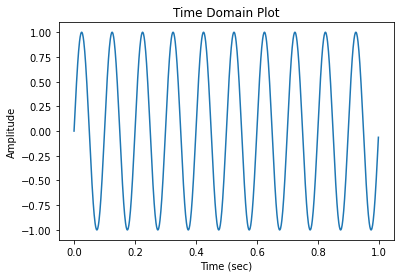

In [ ]:
# Plotting the singletone sine wave
plt.figure()
plt.plot(t, singletone_sine_wave)
plt.title("Time Domain Plot")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

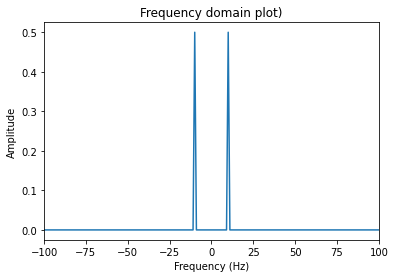

In [ ]:
# Plotting the Discrete Fourier Transform of singletone sine wave
plt.figure()
plt.plot(xf, np.abs(y_fft))
plt.title("Frequency Domain Plot")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((-100, 100))
plt.show()

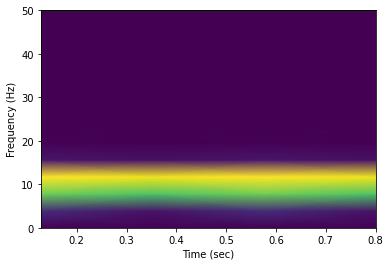

In [ ]:
# Plotting the spectrogram
plt.pcolormesh(t_spectro, f_spectro, Sxx, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim((0, 50))
plt.show()

## **Problem B**
Generation of a multitone sine wave and its spectrum. 
* Generate a multitone sine wave composed of 10, 50 and 100 Hz frequency components. Use a sampling frequency of 1000Hz and a wave of duration 1 sec for the problem.


### **Procedure**

1. Generate the sinusoid using the frequency values given above using the Numpy lirary. 
2. Plot the waveform and the magnitude spectrum of the generated signal using matplotlib and scipy libraries. 
3. Also generate the spectrogram using scipy.

In [ ]:
# Defining the parameters
fs = 1000 # Sampling frequency
# Defining 3 defferent fequency values
f1 = 10
f2 = 50
f3 = 100
t_max = 1 # Maximum duration (s) to be generated
t = np.arange(0, t_max, 1/fs)

In [ ]:
# Generating a multitone sine wave
multitone_sine_wave = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

In [ ]:
# Getting the Discrete Fourier Transform of the multitone sine wave
multitone_sine_fft = fft(multitone_sine_wave)/len(t)

f_array = fftfreq(len(t), 1/fs)

# shifting the arrays for plotting
xf = fftshift(f_array)
y_fft = fftshift(multitone_sine_fft)

In [ ]:
# Generating the spectrogram
f_spectro, t_spectro, Sxx = signal.spectrogram(multitone_sine_wave, fs)

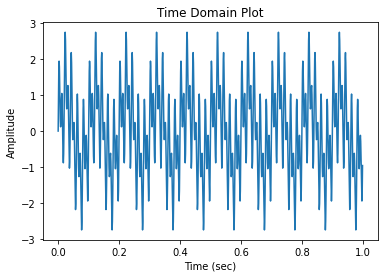

In [ ]:
# Plotting the multitone sine wave
plt.figure()
plt.plot(t, multitone_sine_wave)
plt.title("Time Domain Plot")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

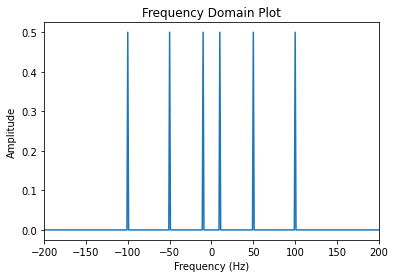

In [ ]:
# Plotting the Discrete Fourier Transform of multitone sine wave
plt.figure()
plt.plot(xf, np.abs(y_fft))
plt.title("Frequency Domain Plot")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((-200, 200))
plt.show()

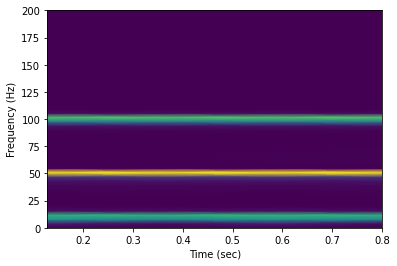

In [ ]:
# Plotting the spectrogram
plt.pcolormesh(t_spectro, f_spectro, Sxx, shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.ylim((0, 200))
plt.show()

## **Problem C**
Generation of a non-stationary multitone sine wave and its spectrum
* Generate a non-stationary multitone sine wave made of different combinations of 10, 50 and 100 Hz components. Example combination: 
 1. Sin(2𝛱*10*t)  0 < t < 0.2 sec
 2. Sin(2𝛱*10*t) + Sin(2𝛱*50*t) 0.2 < t < 0.5 sec
 3. Sin(2𝛱*10*t) + Sin(2𝛱*50*t) + Sin(2𝛱*100*t) 0.5 < t < 1 sec


### **Procedure**

1. Define 3 different sinusoids with the above frequency values.
2. Combines these parts appropriately to generate the above non-stationary signal.
3. Plot the waveform and magnitude spectrum of the entire non-stationary signal as well as the stationary subparts separately.  

In [ ]:
# Defining the parameters
fs = 1000 # Sampling frequency
# Defining 3 defferent fequency values
f1 = 10
f2 = 50
f3 = 100
# 3 different sections of time (sec)
t1 = np.arange(0, 0.2, 1/fs)
t2 = np.arange(0.2, 0.5, 1/fs)
t3 = np.arange(0.5, 1, 1/fs)
t = np.concatenate((t1, t2, t3))

In [ ]:
# Generating a non-stationary multitone sine wave
wave_part1 = np.sin(2*np.pi*f1*t1)
wave_part2 = np.sin(2*np.pi*f1*t2) + np.sin(2*np.pi*f2*t2)
wave_part3 = np.sin(2*np.pi*f1*t3) + np.sin(2*np.pi*f2*t3) + np.sin(2*np.pi*f3*t3)

nonstat_sine_wave = np.concatenate((wave_part1, wave_part2, wave_part3))

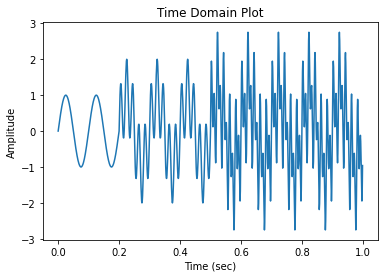

In [ ]:
# Plotting the non-stationary multitone sine wave
plt.figure()
plt.plot(t, nonstat_sine_wave)
plt.title("Time Domain Plot")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

* Generate the frequency spectrum taking the whole signal at once and taking each stationary part of the signal individually. Record your observations on the spectrum obtained by using the whole signal,  the stationary parts individually and the limitations of Fourier Transform when we consider the whole non-stationary speech signal.

We begin by generating the frequency spectrum of the whole non-stationary at once.

In [ ]:
# Getting the Discrete Fourier Transform of the non-stationary multitone sine wave
nonstat_sine_fft = fft(nonstat_sine_wave)/len(t)

f_array = fftfreq(len(t), 1/fs)

# shifting the arrays for plotting
xf = fftshift(f_array)
y_fft = fftshift(nonstat_sine_fft)

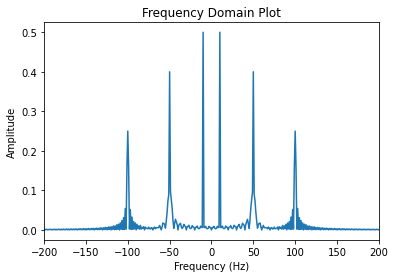

In [ ]:
# Plotting the Discrete Fourier Transform of non-stationary multitone sine wave
plt.figure()
plt.plot(xf, np.abs(y_fft))
plt.title("Frequency Domain Plot")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((-200, 200))
plt.show()

We now generate the frequency spectrum of the 3 parts seperately.


In [ ]:
# Getting the DFT of the 3 stationary parts separately 
part1_fft = fft(wave_part1)/len(t1)
part2_fft = fft(wave_part2)/len(t2)
part3_fft = fft(wave_part3)/len(t3)

f1_array = fftfreq(len(t1), 1/fs)
f2_array = fftfreq(len(t2), 1/fs)
f3_array = fftfreq(len(t3), 1/fs)

# shifting the arrays for plotting
xf1 = fftshift(f1_array)
y1_fft = fftshift(part1_fft)
xf2 = fftshift(f2_array)
y2_fft = fftshift(part2_fft)
xf3 = fftshift(f3_array)
y3_fft = fftshift(part3_fft)

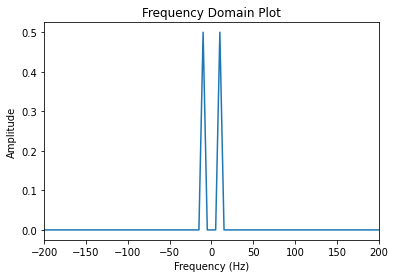

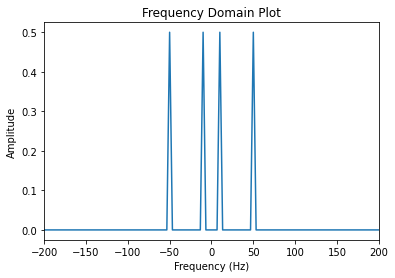

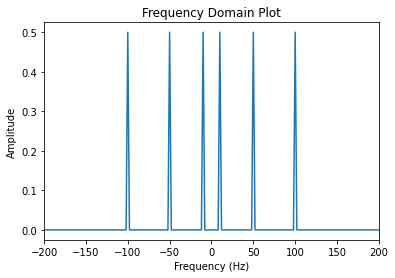

In [ ]:
# Plotting the DFT of the 3 stationary parts separately 
plt.figure()
plt.plot(xf1, np.abs(y1_fft))
plt.title("Frequency Domain Plot")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((-200, 200))
plt.show()

plt.figure()
plt.plot(xf2, np.abs(y2_fft))
plt.title("Frequency Domain Plot")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((-200, 200))
plt.show()

plt.figure()
plt.plot(xf3, np.abs(y3_fft))
plt.title("Frequency Domain Plot")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim((-200, 200))
plt.show()

### **Observation**

1. We observe that when we take the DFT of entire non-stationary signal, we get false values of the magnitudes of the frequency components. 
2. When we plot the magnitude spectrum of the stationary parts induvidually we get the correct magnitude values.
3. This shows the limitations of Fourier Transform that if a frequency component is present only in a part of the signal, its magnitude would not be reflected correctly in the magnitude spectrum.
4. There is essential information stored in time domain in case of non-stationary signals, so FT cannot analyse them correctly. We use FT on small windows of such signals to estimate correct analysis.

## **Problem D**
Plotting waveform and spectra of speech signal. 
* Record the phrase ‘Sakshaat Speech Processing’ and save it in a .wav file. Now, (re)sample the speech signal to 8kHz and plot the speech signal. 

### **Procedure**

1. Record the phrase ‘Sakshaat Speech Processing’ using WaveSurfer and save it as a .wav file. 
2. Upload this file to Google Drive. Mount this drive onto the colab notebook to access the audio file.
3. Load the audio file using Librosa library with a sampling frequency of 8kHz.
4. Plot the waveform of the speech audio signal using functions from matplotlib and librosa.*italicized text*

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 2

/content/drive/MyDrive/Speech Processing Lab/Lab 2


In [27]:
!ls

sakshat_sp.wav


In [29]:
# We use a sampling frequency of 8kHz to sample the audio
fs = 8000

# We record the speech audio using WaveSurfer and save it as .wav file
# Loading the .wav file from Gdrive
audio, fs = librosa.load("sakshat_sp.wav",sr = fs)

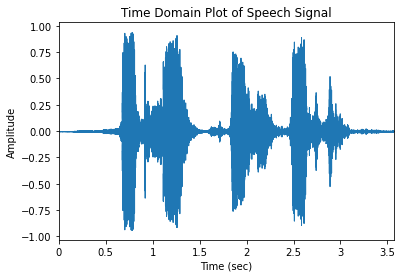

In [32]:
# Plotting the speech signal
plt.figure()
librosa.display.waveplot(audio, sr=fs);
plt.title("Time Domain Plot of Speech Signal")
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.show()

* Compute and plot the spectrum of the different categories of sounds present in the recorded speech file. Inspect the spectral properties of sounds belonging to different categories, and comment on the nature of the whole speech signal. 

### **Procedure**

1. Use WaveSurfer to play and identify the time stamps where different voiced and unvoiced sounds are present.
2. The following sounds are identified here:  

 * ss
 * aa
 * sh
 * th
 * ee
 * ch
 * r
 * o
 * ing
3. We then run a loop over all the extracted sounds to plot the magnitude spectrum for each sound.

In [46]:
# Using WaveSurfer the time stamps of each of the following
# speech sounds (voiced and unvoiced) has been recorded:

# ss => 0.584s - 0.657s
# aa => 1.140s - 1.247s
# sh => 0.952s - 1.081s
# th => 1.397s - 1.458s
# ee => 1.861s - 1.960s
# ch => 2.109s - 2.204s
# r => 2.484s - 2.531s
# o => 2.543s - 2.621s
# ing => 2.870s - 2.992s

# Extract each sound in different variables
ss = audio[int(0.584*fs):int(0.657*fs)]
aa = audio[int(1.14*fs):int(1.247*fs)]
sh = audio[int(0.952*fs):int(1.081*fs)]
th = audio[int(1.397*fs):int(1.458*fs)]
ee = audio[int(1.861*fs):int(1.96*fs)]
ch = audio[int(2.109*fs):int(2.204*fs)]
r = audio[int(2.484*fs):int(2.531*fs)]
o = audio[int(2.543*fs):int(2.621*fs)]
ing = audio[int(2.87*fs):int(2.992*fs)]

sound_array = [ss, aa, sh, th, ee, ch, r, o, ing]
sound_name = ['ss','aa','sh','th','ee','ch','r','o','ing']

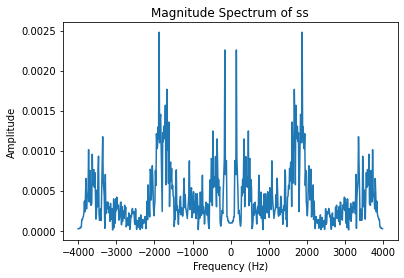

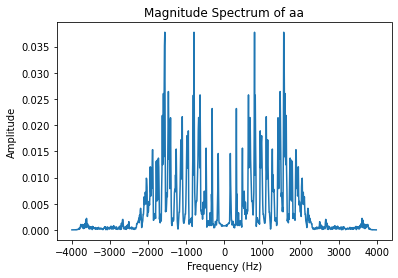

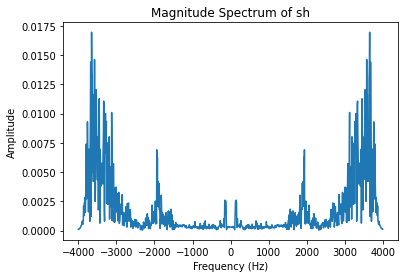

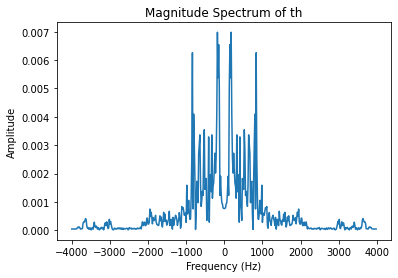

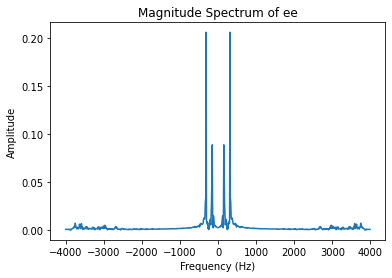

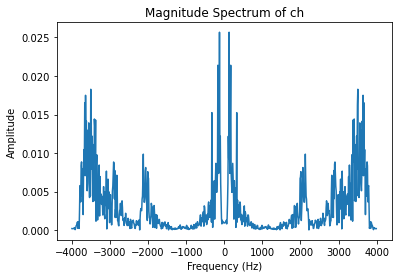

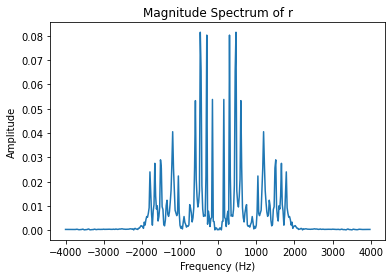

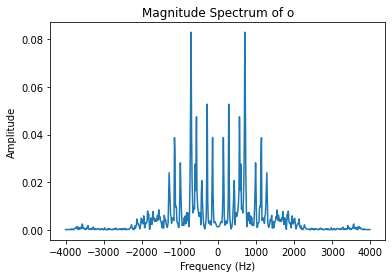

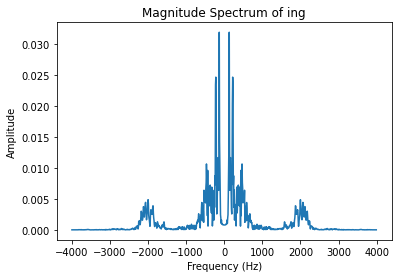

In [51]:
# plotting the magnitude spectrum of the different sounds
i = 0
for sound in sound_array:
    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    f_array = fftfreq(total_len, 1/fs)

    # shifting the arrays for plotting
    xf = fftshift(f_array)
    y_fft = fftshift(audio_fft)

    plt.figure()
    plt.plot(xf, np.abs(y_fft))
    plt.title("Magnitude Spectrum of "+ sound_name[i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()
    i = i+1

### **Observation**

1. We observe that each type of sound has different spectral properties.  
2. Voiced sound like "aa" and "ee" have high energy in lower frequencies and well defined frequency components.
3. Unvoiced sounds like "ss" and "sh" have more energy in the higher frequencies. 
4. Due to the above observations we conclude that speech signal is non-stationary in nature and we cannot use Discrete Fourier Transform to analyse it properly. We use Short time Fourier Transform instead. 